In [1]:
import numpy as np

%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


In [2]:
input_array = np.random.uniform(size=(20,3),low=-1,high=1) # 20*3 
X = np.zeros((20,3))
# input_array = input_array.T

In [3]:
print(input_array)

[[-0.06032609 -0.35501196  0.35474965]
 [ 0.77837604 -0.17906812 -0.76348171]
 [ 0.9310544   0.06201392  0.52325399]
 [ 0.9117732   0.22240945 -0.28686488]
 [-0.6808839  -0.46921144 -0.18029717]
 [ 0.12381948  0.61647524 -0.39180338]
 [-0.40034624 -0.33341499  0.82558326]
 [ 0.99251161 -0.11865316  0.01386352]
 [ 0.96568893  0.83154836  0.78578238]
 [-0.61247716  0.74038077  0.09098817]
 [ 0.06790183 -0.87307511 -0.3731854 ]
 [ 0.40753236  0.57865432  0.01334757]
 [ 0.74234209  0.40923713 -0.40479789]
 [ 0.0679765  -0.85289519 -0.9315196 ]
 [ 0.01010869  0.19202796  0.98583242]
 [ 0.70500043 -0.59194619 -0.38788921]
 [-0.06064244  0.86191093 -0.43933271]
 [ 0.56802599 -0.97402219 -0.45716244]
 [-0.08760039  0.56516737  0.46406538]
 [-0.00519131  0.94913137  0.21030687]]


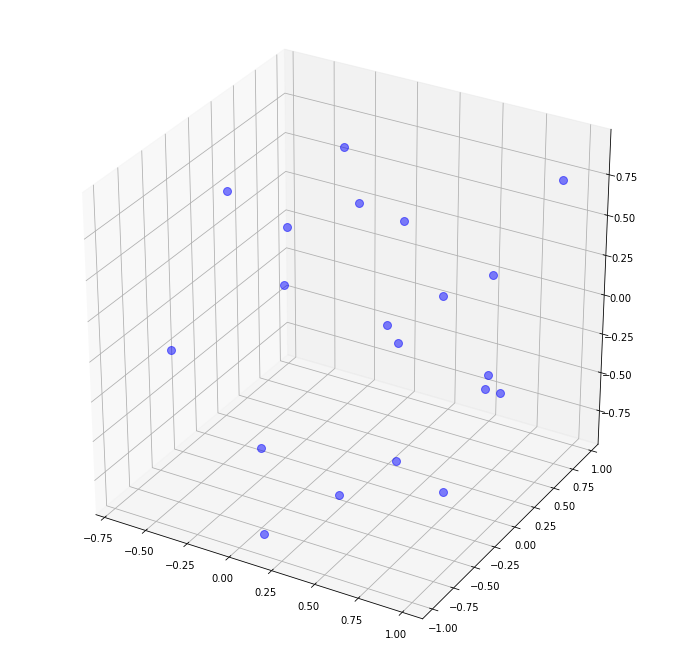

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10  
ax.plot(input_array[:,0], input_array[:,1], input_array[:,2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

In [5]:
#Calculating Mean
mean_x = np.mean(input_array[:,0])
mean_y = np.mean(input_array[:,1])
mean_z = np.mean(input_array[:,2])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.2682322 ]
 [ 0.06408292]
 [-0.01742806]]


In [6]:
#Normalising the value
for i in range(len(input_array)):
    for j in range(3):
        X[i][j] = input_array[i][j] - mean_vector[j]

In [7]:
#Computing scatter matrix 1/m * X(t)*X
scatter_matrix = np.dot(X.T,X)/20.0
print(scatter_matrix)

[[ 0.26791252 -0.00465732 -0.03789878]
 [-0.00465732  0.36927576  0.10992443]
 [-0.03789878  0.10992443  0.27536242]]


In [8]:
#Computing Eigen values and Eigen vectors using library function
eig_val, eig_vec = np.linalg.eig(scatter_matrix)
print('EIGEN VALUES: ',eig_val)
print('EIGEN VECTORS: ',eig_vec)

EIGEN VALUES:  [0.19138473 0.27578718 0.44537878]
EIGEN VECTORS:  [[-0.36496521 -0.92029487  0.14091754]
 [ 0.48247454 -0.31640206 -0.81676683]
 [-0.79625292  0.23010235 -0.55949459]]


In [9]:
#Making pairs of Eigen values and Eigen vectors and sorting in decreasing order
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print(eig_pairs)

[(0.4453787806287562, array([ 0.14091754, -0.81676683, -0.55949459])), (0.2757871796579304, array([-0.92029487, -0.31640206,  0.23010235])), (0.1913847307533236, array([-0.36496521,  0.48247454, -0.79625292]))]


In [10]:
#Converting 3D to 2D
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)           # old*new  

Matrix W:
 [[ 0.14091754 -0.92029487]
 [-0.81676683 -0.31640206]
 [-0.55949459  0.23010235]]


In [11]:
#Transformed input array with 2 dimensions
transformed_data = np.dot(matrix_w.T,input_array.T)    # new*old  and old*rows ==> new*rows
print(transformed_data.T)

[[ 0.08298047  0.24947304]
 [ 0.68310763 -0.83535688]
 [-0.21220679 -0.75606394]
 [ 0.10732753 -0.97547929]
 [ 0.38816315  0.73358663]
 [-0.26685632 -0.39915935]
 [-0.24600287  0.66389843]
 [ 0.2290177  -0.87267121]
 [-0.98273959 -0.97101181]
 [-0.74193462  0.35033818]
 [ 0.93146256  0.12788222]
 [-0.42266508 -0.55506605]
 [-0.00316005 -0.90580203]
 [ 1.22737575 -0.00704547]
 [-0.70698547  0.15678134]
 [ 0.79985086 -0.55076949]
 [-0.46672157 -0.31799296]
 [ 1.13137376 -0.31976293]
 [-0.73359646  0.0085806 ]
 [-0.89361612 -0.24713749]]


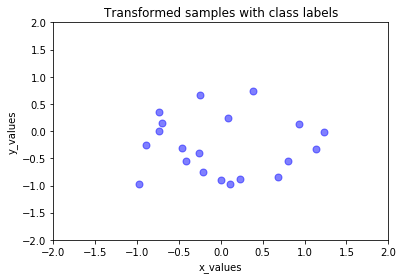

In [12]:
#Graph with 2dimensions
plt.plot(transformed_data[0,0:20], transformed_data[1,0:20], 'o', markersize=7, color='blue', alpha=0.5)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Transformed samples with class labels')

plt.show()